<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1> ML & DL </h1></b></center>

<center><b><h1>Lab - 7</b></center>
    <center><b><h1>Lab - 7</b></center>
        <center><b><h1>Lab - 7</b></center>
            <center><b><h1>Lab - 7</b></center>
<pre>    

# Do all pre processing on diabetes csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split

# Import diabetes.csv data ser using sklearn

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Non Diabetic
764,2,122,70,27,0,36.8,0.340,27,Non Diabetic
765,5,121,72,23,112,26.2,0.245,30,Non Diabetic
766,1,126,60,0,0,30.1,0.349,47,Diabetic


# Check the distribution of the target

In [4]:
df['Outcome'].value_counts()

Outcome
Non Diabetic    500
Diabetic        268
Name: count, dtype: int64

# Replace zeros with NaN for specific columns

In [5]:
df = df.replace(0, np.nan)

# Check for missing values

In [6]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Fill missing values with median

In [7]:
medi_pre,medi_gluc, medi_bp, medi_skin, medi_ins, medi_bmi = df['Pregnancies'].median(), df['Glucose'].median(), df['BloodPressure'].median(), df['SkinThickness'].median(), df['Insulin'].median(), df['BMI'].median()

# Convert Targer data into interger code

In [8]:
df['Pregnancies'].fillna(medi_pre, inplace=True)
df['Glucose'].fillna(medi_gluc, inplace=True)
df['BloodPressure'].fillna(medi_bp, inplace=True)
df['SkinThickness'].fillna(medi_skin, inplace=True)
df['Insulin'].fillna(medi_ins, inplace=True)
df['BMI'].fillna(medi_bmi, inplace=True)

C:\Users\dhame\AppData\Local\Temp\ipykernel_19984\94895953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pregnancies'].fillna(medi_pre, inplace=True)
C:\Users\dhame\AppData\Local\Temp\ipykernel_19984\94895953.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

# Visualize Distributions

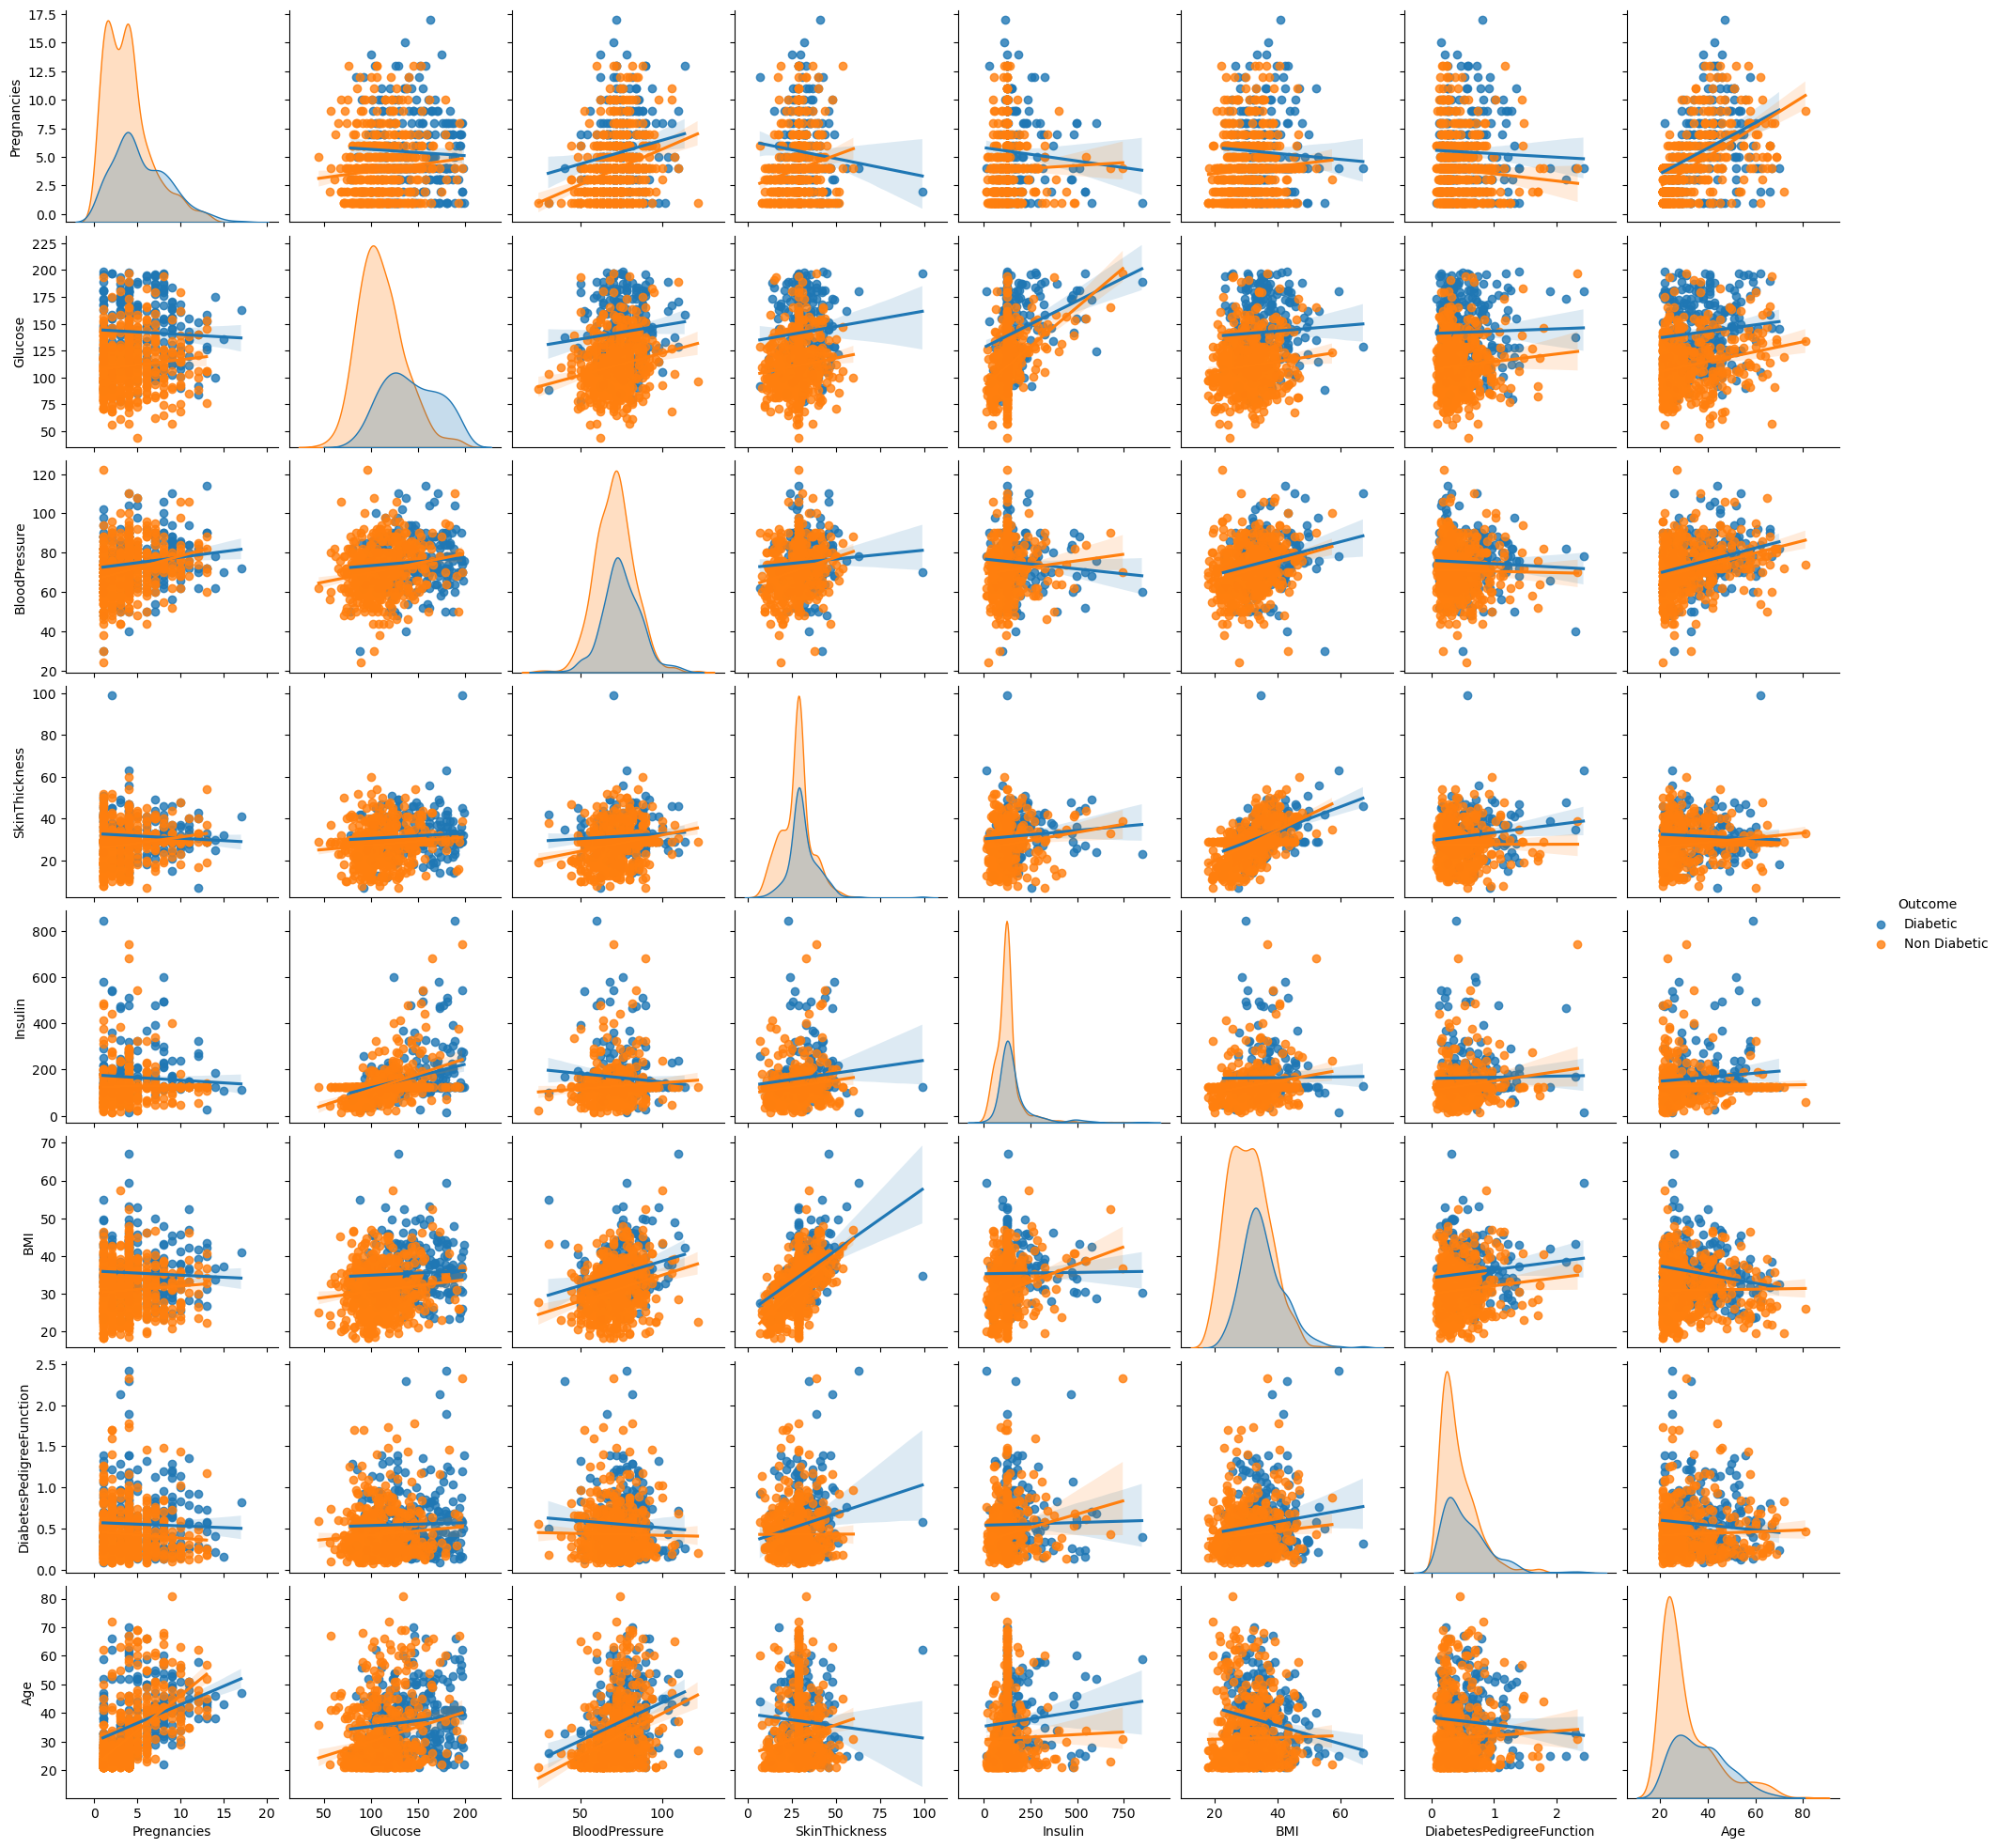

In [9]:
sns.pairplot(df, hue='Outcome', kind='reg')

<Axes: >

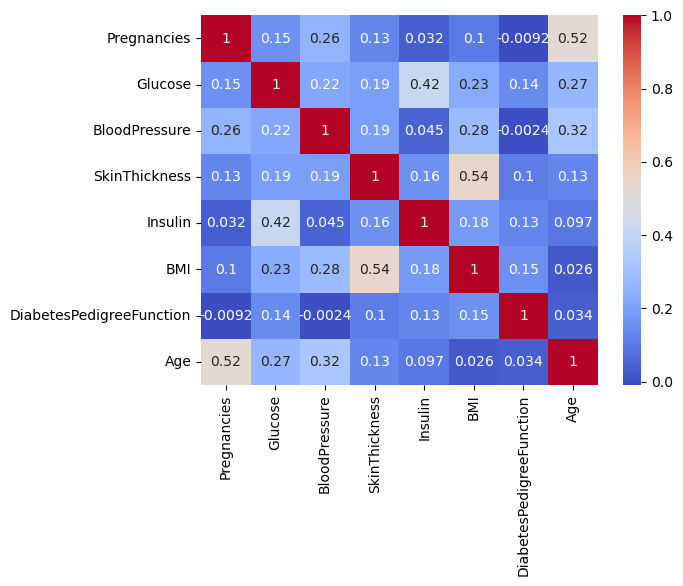

In [10]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
df['Outcome'] = df['Outcome'].map({'Diabetic':0, 'Non Diabetic':1})

# Divide the data into input and output

In [12]:
X = df.drop('Outcome', axis=1)

In [13]:
y = df['Outcome']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

# import KNN Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Convert all features into Z score

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scalar = StandardScaler()

In [49]:
X_train_sacled = scalar.fit_transform(X_train)

In [50]:
X_test_sacled = scalar.transform(X_test)

In [51]:
X_train_sacled

array([[ 1.81930104,  1.84625305, -0.20694355, ...,  0.40370879,
        -0.82076578,  0.32050329],
       [ 0.17180151, -0.78430569, -1.53967943, ...,  0.24656115,
         0.0487829 , -0.28293514],
       [-0.81669821, -0.02802006, -1.70627142, ...,  0.56085644,
         0.970679  , -0.45534612],
       ...,
       [-0.1576984 ,  0.0706259 , -0.20694355, ..., -0.48203247,
         1.92456518,  1.01014722],
       [-0.48719831, -0.22531196,  0.12624043, ..., -0.85347235,
        -1.09122741, -0.80016809],
       [-0.1576984 , -0.42260387, -0.54012752, ..., -0.05344799,
        -0.03264641, -0.36914063]])

# Splitting the dataset into the Training set and Test set

In [52]:
print(X_train_sacled.shape, X_test_sacled.shape, y_train.shape, y_test.shape)

(514, 8) (254, 8) (514,) (254,)


# Create KNN Model

In [53]:
neigh = KNeighborsClassifier(n_neighbors=3)

# Fitting KNN   on dataset

In [54]:
neigh.fit(X_train_sacled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
neigh.score(X_test_sacled, y_test)

0.7125984251968503

# Display classification_report

In [57]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [59]:
y_pred = neigh.predict(X_test_sacled)

In [62]:
metrix = confusion_matrix(y_test, y_pred)

In [65]:
display = ConfusionMatrixDisplay(metrix, display_labels=['Diabetic', 'Non Diabetic'])

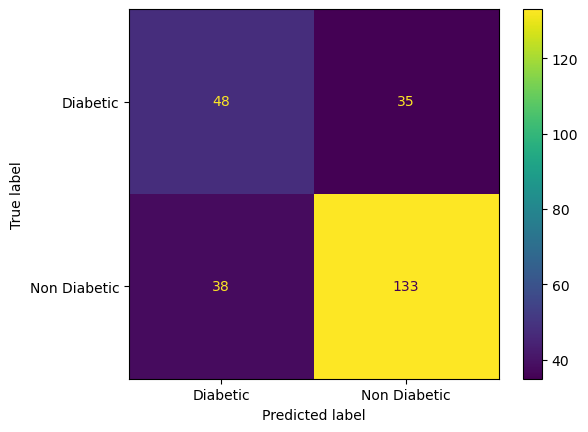

In [66]:
display.plot()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        83
           1       0.79      0.78      0.78       171

    accuracy                           0.71       254
   macro avg       0.67      0.68      0.68       254
weighted avg       0.72      0.71      0.71       254



# Use Cross Validation to find best hyperparameter for KNN

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
from sklearn.model_selection import KFold

In [70]:
k = KFold(n_splits=10)

In [28]:
import numpy as np

In [29]:
x1 = np.arange(1,11).reshape(-1,1)

In [30]:
y1 = np.array([0,1,0,1,0,1,0,1,0,1])

In [31]:
x1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [32]:
y1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [33]:
for i,j in k.split(x1):
    print("<------>")
    print(x1[i])
    print(x1[j])
    x_train,x_test = x1[i],x1[j]
    y_train,y_test = y1[i],y1[j]
    

<------>
[[ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1]]
<------>
[[ 1]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[2]]
<------>
[[ 1]
 [ 2]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[3]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[4]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[5]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[6]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 8]
 [ 9]
 [10]]
[[7]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 9]
 [10]]
[[8]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]]
[[9]]
<------>
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[10]]


In [71]:
parameters = {'n_neighbors':(1,2,3,4,5,6,7,8,9,10,11),'weights':('uniform', 'distance')}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
grid_search = GridSearchCV(neigh, parameters)

In [74]:
grid_search.fit(X_train_sacled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
                         'weights': ('uniform', 'distance')})

In [78]:
print(grid_search.best_params_)

{'n_neighbors': 11, 'weights': 'uniform'}


In [79]:
print(grid_search.best_score_)

0.7822196839901009


In [80]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [81]:
grid_search.cv_results_

{'mean_fit_time': array([0.00179615, 0.00150671, 0.00138073, 0.00079236, 0.0007719 ,
        0.00123968, 0.00118861, 0.0013206 , 0.00145268, 0.00082841,
        0.00087047, 0.00095282, 0.00132599, 0.000772  , 0.00087948,
        0.00071688, 0.00141201, 0.00148058, 0.00105944, 0.00075245,
        0.00077395, 0.00075812]),
 'std_fit_time': array([3.15689089e-04, 2.39691199e-05, 2.20782062e-04, 1.12727632e-04,
        1.06020965e-05, 4.49230931e-04, 3.37555634e-04, 2.99860327e-04,
        2.04776328e-04, 1.81503014e-04, 1.42843573e-04, 2.11365599e-04,
        3.29892564e-04, 2.25942332e-05, 2.00771967e-04, 1.19127245e-05,
        3.54394172e-04, 2.97043142e-05, 3.29914205e-04, 2.11996888e-05,
        2.65797261e-05, 9.96966040e-06]),
 'mean_score_time': array([0.01013222, 0.00231266, 0.00670738, 0.00109391, 0.0033546 ,
        0.002141  , 0.00721769, 0.00211005, 0.00816236, 0.00140991,
        0.00337672, 0.00177164, 0.00693455, 0.00125203, 0.00384068,
        0.00118694, 0.00824695, 0.00

In [36]:
# Randomstate = 1
# Test size 0.3
# 